In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import joblib

# Load Data and Eliminate the ethernet features

In [2]:
dnscat2_csv = pd.read_csv("dnscat2_features.csv")
dnscat2_csv2 = pd.read_csv("test_dnscat2_features.csv")
dnsexfiltrator_csv = pd.read_csv("dnsexfiltrator_features.csv")
dnsexfiltrator_csv2 = pd.read_csv("test_dnsexfiltrator_features.csv")

In [3]:
df_c2 = pd.concat([pd.DataFrame(dnscat2_csv), pd.DataFrame(dnscat2_csv2)], axis=0)
df_exfil = pd.concat([pd.DataFrame(dnsexfiltrator_csv), pd.DataFrame(dnsexfiltrator_csv2)], axis=0)

In [4]:
df_c2

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,10.0.2.23,10.0.2.22,58208,443,2023-10-26 14:02:17,33.513147,5536,165.188903,6834,203.919972,...,2.299151,35.990422,5.999202,1.255280,0.002635,0.000147,0.626406,0.209217,4.779173,True
1,10.0.2.23,10.0.2.22,56364,443,2023-10-26 14:02:21,30.019718,1366,45.503425,2919,97.236090,...,1.469559,0.001603,0.040040,0.018296,0.000360,0.000276,1.343904,0.450053,2.188440,True
2,10.0.2.23,10.0.2.22,36128,443,2023-10-23 21:25:15,523.894440,322475,615.534305,286017,545.943950,...,0.592067,0.000003,0.001617,0.002370,0.002276,0.002220,0.175285,0.093063,0.682089,True
3,10.0.2.23,10.0.2.22,35410,443,2023-10-26 18:25:45,465.830562,240236,515.715412,215791,463.239250,...,0.585995,0.000006,0.002444,0.002849,0.002580,0.002445,0.330464,0.165399,0.857687,True
4,10.0.2.23,10.0.2.22,56286,443,2023-10-24 10:03:05,705.887784,434806,615.970427,385345,545.901217,...,0.584099,0.000002,0.001428,0.002500,0.002412,0.002376,0.185373,0.086646,0.571365,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,10.0.2.23,10.0.2.22,53934,443,2023-11-21 09:04:20,926.117062,739845,798.867692,648149,699.856451,...,0.578983,0.000001,0.001172,0.002624,0.002537,0.002355,0.222748,0.229516,0.446708,True
108,10.0.2.23,10.0.2.22,54138,443,2023-11-17 16:22:26,823.004506,685860,833.361172,601472,730.824674,...,0.573437,0.000001,0.001096,0.002405,0.002346,0.002288,0.160742,0.106482,0.455923,True
109,10.0.2.23,10.0.2.22,39732,443,2023-11-17 14:52:36,121.390459,122583,1009.824009,108206,891.388013,...,0.582495,0.000007,0.002564,0.002516,0.002348,0.002270,0.196077,0.095779,1.019283,True
110,10.0.2.23,10.0.2.22,41210,443,2023-11-17 18:17:34,242.037555,149136,616.168842,133543,551.744955,...,0.592150,0.000006,0.002385,0.002483,0.002325,0.002241,0.199222,0.101620,0.960570,True


In [5]:
#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','TimeStamp','DoH'],axis=1)

# below = test
df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMode', 'PacketLengthSkewFromMode', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode', 'ResponseTimeTimeCoefficientofVariation','TimeStamp','DoH'],axis=1)
df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMode', 'PacketLengthSkewFromMode', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode', 'ResponseTimeTimeCoefficientofVariation','TimeStamp','DoH'],axis=1)

#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','TimeStamp','DoH'],axis=1)

#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','TimeStamp','DoH'],axis=1)

#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian','TimeStamp','DoH'],axis=1)

#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian', 'ResponseTimeTimeMode','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian','ResponseTimeTimeMode','TimeStamp','DoH'],axis=1)

#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian', 'ResponseTimeTimeMode','PacketLengthSkewFromMedian','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian','ResponseTimeTimeMode','PacketLengthSkewFromMedian','TimeStamp','DoH'],axis=1)


# Add Class Label to the data and Join the data

In [6]:
df_exfil['Class']= 0 # dnsexfiltrator
df_c2['Class']= 1 # dnscat2

In [7]:
#minimum = min(len(df_c2), len(df1_exfil))
#print(minimum)
#df_c2 = df_c2.head(minimum)
#df_exfil = df_exfil.head(minimum)

In [8]:
df_c2

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,Class
0,33.513147,5536,165.188903,6834,203.919972,41472.004082,203.646763,176.714286,167.5,0.135739,1.152407,69.971752,8.364912,3.638261,1.201436,33.511865,0.873945,-3.571299,2.299151,1
1,30.019718,1366,45.503425,2919,97.236090,138034.249307,371.529608,225.526316,74.0,1.223534,1.647389,194.505752,13.946532,9.490283,0.013570,30.018163,2.038510,-1.471899,1.469559,1
2,523.894440,322475,615.534305,286017,545.943950,5266.821921,72.572873,151.065541,168.0,-0.700033,0.480407,23356.456022,152.828191,258.126397,258.583112,0.000000,-0.008965,1.688997,0.592067,1
3,465.830562,240236,515.715412,215791,463.239250,5449.099818,73.818018,151.503987,168.0,-0.670406,0.487235,18244.949552,135.073867,230.503599,229.620026,0.000000,0.019624,1.706500,0.585995,1
4,705.887784,434806,615.970427,385345,545.901217,5228.891503,72.311075,151.487071,168.0,-0.685079,0.477342,41656.015182,204.098053,349.423848,347.051068,0.004951,0.034877,1.712015,0.584099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,926.117062,739845,798.867692,648149,699.856451,4621.983722,67.985173,149.359087,167.0,-0.778445,0.455179,71368.535186,267.148901,461.410620,459.761629,0.000000,0.018518,1.727166,0.578983,1
108,823.004506,685860,833.361172,601472,730.824674,5484.209544,74.055449,152.346982,168.0,-0.634107,0.486097,57171.491073,239.105607,416.968973,417.828727,0.000000,-0.010787,1.743869,0.573437,1
109,121.390459,122583,1009.824009,108206,891.388013,7115.890589,84.355738,153.654461,168.0,-0.510180,0.548996,1238.953775,35.198775,60.427561,60.281983,0.000000,0.012408,1.716752,0.582495,1
110,242.037555,149136,616.168842,133543,551.744955,6011.358217,77.532949,151.327088,167.0,-0.606436,0.512353,5012.871956,70.801638,119.567116,118.565315,0.000000,0.042448,1.688762,0.592150,1


In [9]:
df_exfil

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,Class
0,324.741605,213522,657.513533,189065,582.201347,13794.950094,117.451905,213.574005,285.0,-1.824389,0.549935,8.769442e+03,93.645301,160.277967,160.426372,0.0,-0.004754,1.711543,0.584268,0
1,17.252199,7692,445.856207,8100,469.505366,48651.312500,220.570425,246.750000,234.5,0.166613,0.893902,2.398376e+01,4.897322,5.903528,5.094132,0.0,0.495820,1.205461,0.829558,0
2,1193.206790,536893,449.958050,491082,411.564872,28726.314122,169.488389,291.046149,401.0,-1.946219,0.582342,1.192418e+05,345.314112,592.765582,592.608281,0.0,0.001367,1.716598,0.582548,0
3,553.302413,233015,421.134979,213822,386.446896,25038.245658,158.234780,272.129720,372.0,-1.893458,0.581468,2.576323e+04,160.509270,272.924177,272.720191,0.0,0.003813,1.700364,0.588109,0
4,499.914188,440614,881.379266,391917,783.968548,27869.659703,166.942085,286.881806,396.0,-1.960887,0.581919,2.078491e+04,144.169733,247.939637,247.894269,0.0,0.000944,1.719776,0.581471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2462.327343,553062,224.609454,509823,207.049238,4732.555003,68.793568,146.020745,174.0,-1.220140,0.471122,5.064610e+05,711.660739,1227.297479,1227.599235,0.0,-0.001272,1.724554,0.579860,0
105,5221.332085,1469035,281.352532,1320336,252.873401,4416.304281,66.455280,144.676919,174.0,-1.323736,0.459336,2.273074e+06,1507.671601,2607.533444,2607.296905,0.0,0.000471,1.729510,0.578198,0
106,1935.792473,610755,315.506444,556667,287.565433,8649.333466,93.001793,181.983164,231.0,-1.581158,0.511046,3.130285e+05,559.489495,964.386457,964.638246,0.0,-0.001350,1.723690,0.580151,0
107,1593.703146,882007,553.432427,774701,486.101193,8124.523053,90.136136,178.929474,231.0,-1.733063,0.503752,2.116103e+05,460.011143,794.693809,794.929212,0.0,-0.001535,1.727553,0.578853,0


In [10]:
frame = [df_exfil,df_c2]
df_binary = pd.concat(frame)

In [11]:
df_binary

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,Class
0,324.741605,213522,657.513533,189065,582.201347,13794.950094,117.451905,213.574005,285.0,-1.824389,0.549935,8769.442476,93.645301,160.277967,160.426372,0.000000,-0.004754,1.711543,0.584268,0
1,17.252199,7692,445.856207,8100,469.505366,48651.312500,220.570425,246.750000,234.5,0.166613,0.893902,23.983759,4.897322,5.903528,5.094132,0.000000,0.495820,1.205461,0.829558,0
2,1193.206790,536893,449.958050,491082,411.564872,28726.314122,169.488389,291.046149,401.0,-1.946219,0.582342,119241.836198,345.314112,592.765582,592.608281,0.000000,0.001367,1.716598,0.582548,0
3,553.302413,233015,421.134979,213822,386.446896,25038.245658,158.234780,272.129720,372.0,-1.893458,0.581468,25763.225716,160.509270,272.924177,272.720191,0.000000,0.003813,1.700364,0.588109,0
4,499.914188,440614,881.379266,391917,783.968548,27869.659703,166.942085,286.881806,396.0,-1.960887,0.581919,20784.911831,144.169733,247.939637,247.894269,0.000000,0.000944,1.719776,0.581471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,926.117062,739845,798.867692,648149,699.856451,4621.983722,67.985173,149.359087,167.0,-0.778445,0.455179,71368.535186,267.148901,461.410620,459.761629,0.000000,0.018518,1.727166,0.578983,1
108,823.004506,685860,833.361172,601472,730.824674,5484.209544,74.055449,152.346982,168.0,-0.634107,0.486097,57171.491073,239.105607,416.968973,417.828727,0.000000,-0.010787,1.743869,0.573437,1
109,121.390459,122583,1009.824009,108206,891.388013,7115.890589,84.355738,153.654461,168.0,-0.510180,0.548996,1238.953775,35.198775,60.427561,60.281983,0.000000,0.012408,1.716752,0.582495,1
110,242.037555,149136,616.168842,133543,551.744955,6011.358217,77.532949,151.327088,167.0,-0.606436,0.512353,5012.871956,70.801638,119.567116,118.565315,0.000000,0.042448,1.688762,0.592150,1


In [12]:
df_binary = df_binary.reset_index(drop=True) #reset and create a new index

In [13]:
df_binary

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,Class
0,324.741605,213522,657.513533,189065,582.201347,13794.950094,117.451905,213.574005,285.0,-1.824389,0.549935,8769.442476,93.645301,160.277967,160.426372,0.000000,-0.004754,1.711543,0.584268,0
1,17.252199,7692,445.856207,8100,469.505366,48651.312500,220.570425,246.750000,234.5,0.166613,0.893902,23.983759,4.897322,5.903528,5.094132,0.000000,0.495820,1.205461,0.829558,0
2,1193.206790,536893,449.958050,491082,411.564872,28726.314122,169.488389,291.046149,401.0,-1.946219,0.582342,119241.836198,345.314112,592.765582,592.608281,0.000000,0.001367,1.716598,0.582548,0
3,553.302413,233015,421.134979,213822,386.446896,25038.245658,158.234780,272.129720,372.0,-1.893458,0.581468,25763.225716,160.509270,272.924177,272.720191,0.000000,0.003813,1.700364,0.588109,0
4,499.914188,440614,881.379266,391917,783.968548,27869.659703,166.942085,286.881806,396.0,-1.960887,0.581919,20784.911831,144.169733,247.939637,247.894269,0.000000,0.000944,1.719776,0.581471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,926.117062,739845,798.867692,648149,699.856451,4621.983722,67.985173,149.359087,167.0,-0.778445,0.455179,71368.535186,267.148901,461.410620,459.761629,0.000000,0.018518,1.727166,0.578983,1
1946,823.004506,685860,833.361172,601472,730.824674,5484.209544,74.055449,152.346982,168.0,-0.634107,0.486097,57171.491073,239.105607,416.968973,417.828727,0.000000,-0.010787,1.743869,0.573437,1
1947,121.390459,122583,1009.824009,108206,891.388013,7115.890589,84.355738,153.654461,168.0,-0.510180,0.548996,1238.953775,35.198775,60.427561,60.281983,0.000000,0.012408,1.716752,0.582495,1
1948,242.037555,149136,616.168842,133543,551.744955,6011.358217,77.532949,151.327088,167.0,-0.606436,0.512353,5012.871956,70.801638,119.567116,118.565315,0.000000,0.042448,1.688762,0.592150,1


In [14]:
df_binary.columns[7]

'PacketLengthMean'

# Split the data and Normalize 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Split the dataset in 80:20
X_train, X_test, y_train, y_test = train_test_split(df_binary[[col for col in df_binary.columns if col != "Class"]], 
                                                    df_binary["Class"], test_size=0.2)
X_train.shape, X_test.shape

((1560, 19), (390, 19))

In [16]:
y_train.shape, y_test.shape

((1560,), (390,))

In [17]:
X_train

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation
974,33.513147,5536,165.188903,6834,203.919972,41472.004082,203.646763,176.714286,167.5,0.135739,1.152407,6.997175e+01,8.364912,3.638261,1.201436,33.511865,0.873945,-3.571299,2.299151
886,5020.937213,2224304,443.005739,1930779,384.545538,4123.350913,64.213323,142.277873,174.0,-1.482035,0.451323,2.100062e+06,1449.158939,2508.481551,2508.938998,0.000000,-0.000947,1.730991,0.577704
1545,1001.920242,727872,726.476988,640209,638.982000,5851.088695,76.492409,154.028485,168.0,-0.547957,0.496612,8.460071e+04,290.862013,497.856166,497.480622,0.000000,0.003873,1.711658,0.584229
659,738.194300,320845,434.634892,288556,390.894376,11052.563522,105.131173,197.729072,257.0,-1.691342,0.531693,4.551811e+04,213.349728,366.362437,366.275616,0.000000,0.001221,1.717192,0.582346
754,89.890943,49233,547.697002,45237,503.243135,24028.076886,155.009925,249.261214,340.0,-1.756122,0.621877,6.820987e+02,26.117020,42.263731,42.399866,0.000000,-0.015637,1.618245,0.617953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,302.165366,155129,513.391068,140151,463.822184,17672.915639,132.939519,233.607595,314.0,-1.814188,0.569072,7.649387e+03,87.460776,148.378401,148.258940,0.000000,0.004098,1.696514,0.589444
273,666.520772,333111,499.775872,303520,455.379656,28775.723106,169.634086,289.772872,400.0,-1.949381,0.585404,3.726000e+04,193.028490,329.898957,330.244212,0.000000,-0.005366,1.709069,0.585114
1410,210.388110,198380,942.924008,173908,826.605648,4996.914699,70.688858,148.321912,168.0,-0.835128,0.476591,3.746758e+03,61.210767,104.552691,104.516071,0.000000,0.001795,1.708077,0.585454
1042,1076.421709,876500,814.271946,772133,717.314593,4222.642834,64.981865,147.436326,168.0,-0.949357,0.440745,9.677517e+04,311.087080,537.380073,537.427497,869.664127,-0.000457,-1.068138,0.578896


In [18]:
y_train

974     1
886     0
1545    1
659     0
754     0
       ..
697     0
273     0
1410    1
1042    1
315     0
Name: Class, Length: 1560, dtype: int64

In [19]:
count_values = y_test.value_counts()
print(count_values)
# 0: dnsexfiltrator
# 1: dnscat2

0    198
1    192
Name: Class, dtype: int64


In [20]:
from sklearn import preprocessing

x = X_train.values # transform data in numpy array
xtest = X_test.values

min_max_scaler = preprocessing.MinMaxScaler() #create an object to normalize between 0 and 1 by default

#Sources: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
#         https://www.digitalocean.com/community/tutorials/normalize-data-in-python
#         https://medium.com/@spinjosovsky/normalize-data-before-or-after-split-of-training-and-testing-data-7b8005f81e26
x_scaled = min_max_scaler.fit_transform(x)
xtest_scaled = min_max_scaler.transform(xtest)

joblib.dump(min_max_scaler, './min_max_scaler2.joblib')

X_train_new = pd.DataFrame(x_scaled) #reconversion in dataframe
X_test_new = pd.DataFrame(xtest_scaled)

In [21]:
X_train_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.001966,0.000000,0.000000,0.000189,0.000000,0.794594,0.862339,0.234442,0.002137,0.899678,1.000000,0.000006,0.001647,0.000000,0.000000,0.028189,1.000000,0.000000,1.000000
1,0.447305,0.825027,0.327712,0.804864,0.262512,0.006286,0.014368,0.003859,0.029915,0.211800,0.040947,0.200415,0.447159,0.447455,0.447750,0.000000,0.290977,0.991728,0.008292
2,0.088438,0.268593,0.662094,0.265094,0.632297,0.042753,0.089044,0.082540,0.004274,0.608970,0.102900,0.008073,0.088998,0.088285,0.088609,0.000000,0.294883,0.988111,0.012051
3,0.064889,0.117244,0.317838,0.118017,0.271739,0.152539,0.263212,0.375156,0.384615,0.122802,0.150889,0.004343,0.065031,0.064796,0.065183,0.000000,0.292734,0.989147,0.010966
4,0.007000,0.016248,0.451206,0.016251,0.435021,0.426410,0.566552,0.720211,0.739316,0.095257,0.274258,0.000064,0.007136,0.006900,0.007356,0.000000,0.279072,0.970640,0.031479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0.025955,0.055625,0.410738,0.055948,0.377729,0.292273,0.432330,0.615396,0.628205,0.070568,0.202022,0.000729,0.026104,0.025856,0.026257,0.000000,0.295065,0.985279,0.015055
1556,0.058489,0.121805,0.394678,0.124276,0.365459,0.526617,0.655489,0.991474,0.995726,0.013084,0.224363,0.003555,0.058747,0.058282,0.058750,0.000000,0.287396,0.987627,0.012561
1557,0.017760,0.071707,0.917415,0.070067,0.904980,0.024724,0.053749,0.044329,0.004274,0.486865,0.075512,0.000357,0.017987,0.018027,0.018447,0.000000,0.293199,0.987442,0.012757
1558,0.095090,0.323859,0.765657,0.320270,0.746142,0.008382,0.019042,0.038399,0.004274,0.438294,0.026477,0.009235,0.095252,0.095345,0.095742,0.731528,0.291374,0.468185,0.008979


In [22]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.title("Confusion Matrix")
    #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Exfiltration", "C&C"], yticklabels=["Exfiltration", "C&C"])
    
    #labels = ["C&C", "Exfiltration"]
    #plt.xticks(ticks=[0.5, 1.5], labels=labels)
    #plt.yticks(ticks=[0.5, 1.5], labels=labels)
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()

# Logistic Regression

In [23]:
model_filename_logistic = './logistic_regression_model2.joblib'

In [24]:
#Source: https://medium.com/@draj0718/logistic-regression-with-standardscaler-from-the-scratch-ec01def674e8
import time
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score

logistic_model = LogisticRegression(solver = 'liblinear') #Setting the random_state for reproducibility in classification.
logistic_model.fit(X_train_new, y_train)

joblib.dump(logistic_model, model_filename_logistic)

['./logistic_regression_model2.joblib']

In [25]:
logistic_model = joblib.load(model_filename_logistic)

y_pred = logistic_model.predict(X_test_new)

#y_prob = logistic_model.predict_proba(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True)

In [26]:
class_report

{'0': {'precision': 0.9949238578680203,
  'recall': 0.98989898989899,
  'f1-score': 0.9924050632911392,
  'support': 198},
 '1': {'precision': 0.9896373056994818,
  'recall': 0.9947916666666666,
  'f1-score': 0.9922077922077923,
  'support': 192},
 'accuracy': 0.9923076923076923,
 'macro avg': {'precision': 0.992280581783751,
  'recall': 0.9923453282828283,
  'f1-score': 0.9923064277494658,
  'support': 390},
 'weighted avg': {'precision': 0.9923212475696629,
  'recall': 0.9923076923076923,
  'f1-score': 0.9923079452193376,
  'support': 390}}

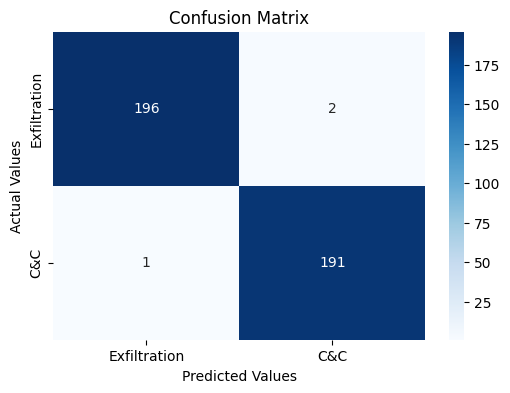

In [27]:
plot_confusion_matrix(y_test, y_pred)

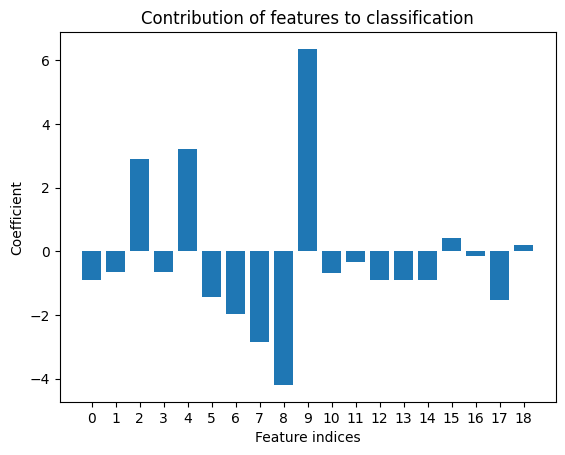

In [28]:
coefficients = logistic_model.coef_

df = df_binary.iloc[:,:-1]

feature_coefficients = dict(zip(df.columns, coefficients[0]))

import matplotlib.pyplot as plt

#print(len(df.columns.tolist()))
#print(len(coefficients[0]))

plt.bar(range(len(df.columns)), coefficients[0])
plt.xlabel("Feature indices")
plt.ylabel("Coefficient")
plt.title("Contribution of features to classification")
plt.xticks(range(len(df.columns)), range(len(df.columns)))  # Facultatif : pour afficher les indices sur l'axe x
plt.show()

In [29]:
print(df.columns[7] + ' ' + str(feature_coefficients['PacketLengthMean']))
print(df.columns[8] + ' ' + str(feature_coefficients['PacketLengthMedian']))
print(df.columns[9] + ' ' + str(feature_coefficients['PacketLengthSkewFromMedian']))

PacketLengthMean -2.845058253423355
PacketLengthMedian -4.194965950091841
PacketLengthSkewFromMedian 6.361704008737701


In [30]:
'''
import sklearn.metrics as metrics

y_pred = logistic_model.predict_proba(X_test_new)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
'''

'\nimport sklearn.metrics as metrics\n\ny_pred = logistic_model.predict_proba(X_test_new)[::,1]\nfpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)\nauc = metrics.roc_auc_score(y_test, y_pred)\nplt.plot(fpr,tpr,label="data 1, auc="+str(auc))\nplt.legend(loc=4)\nplt.show()\n'

# SVM

In [31]:
model_filename_svm = './svm_model2.joblib'

In [32]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train_new, y_train)

joblib.dump(svm_model, model_filename_svm)

['./svm_model2.joblib']

In [33]:
svm_model = joblib.load(model_filename_svm)
y_pred = svm_model.predict(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True)

In [34]:
class_report

{'0': {'precision': 0.9949748743718593,
  'recall': 1.0,
  'f1-score': 0.9974811083123425,
  'support': 198},
 '1': {'precision': 1.0,
  'recall': 0.9947916666666666,
  'f1-score': 0.9973890339425587,
  'support': 192},
 'accuracy': 0.9974358974358974,
 'macro avg': {'precision': 0.9974874371859297,
  'recall': 0.9973958333333333,
  'f1-score': 0.9974350711274507,
  'support': 390},
 'weighted avg': {'precision': 0.9974487823734054,
  'recall': 0.9974358974358974,
  'f1-score': 0.9974357793918336,
  'support': 390}}

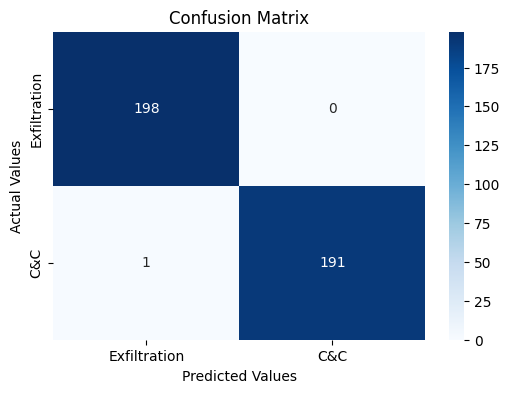

In [35]:
plot_confusion_matrix(y_test, y_pred)

# Naive Bayes

In [36]:
model_filename_nb = './naive_bayes_model2.joblib'

In [37]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_new, y_train)

joblib.dump(naive_bayes_model, model_filename_nb)

['./naive_bayes_model2.joblib']

In [38]:
naive_bayes_model = joblib.load(model_filename_nb)

y_pred = naive_bayes_model.predict(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True)

In [39]:
class_report

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 198},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 192},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 390},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 390}}

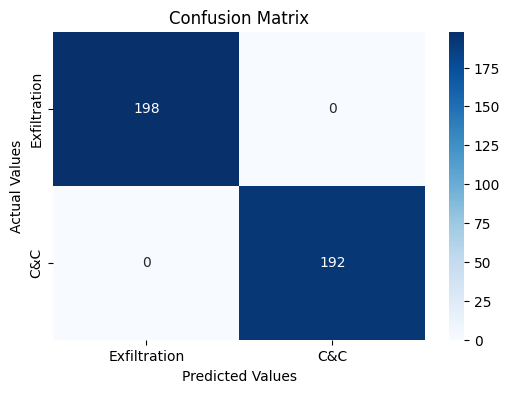

In [40]:
plot_confusion_matrix(y_test, y_pred)

# Decision Tree

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [42]:
model_filename_tree = './decision_tree_model2.joblib'

In [43]:
tree_model = DecisionTreeClassifier(criterion="gini")
tree_model.fit(X_train_new, y_train)

joblib.dump(tree_model, model_filename_tree)

['./decision_tree_model2.joblib']

In [44]:
tree_model = joblib.load(model_filename_tree)

In [45]:
'''import utils
utils.DT_to_PNG(clf, lbc.feature_names, "Tree_task1")
clf.plot_tree(tree1)
plt.show()
'''
from sklearn import tree
text_representation = tree.export_text(tree_model)
print(text_representation)

|--- feature_8 <= 0.01
|   |--- class: 1
|--- feature_8 >  0.01
|   |--- class: 0



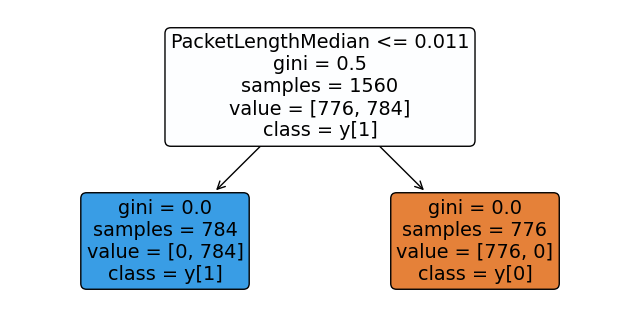

In [46]:
# Affichage de l'arbre de décision
plt.figure(figsize=(8,4))
plot_tree(tree_model, filled=True, feature_names=df.columns, class_names=True, rounded=True)
plt.show()

In [47]:
y_pred = tree_model.predict(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True)

In [48]:
class_report

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 198},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 192},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 390},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 390}}

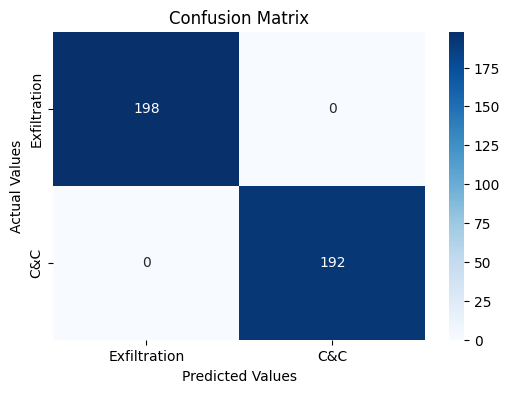

In [49]:
plot_confusion_matrix(y_test, y_pred)